In [8]:
import networkx as nx # version 2.2
import matplotlib.pyplot as plt
import re
import random
import operator #to sort elements in a list of tuples
import itertools
import math
import numpy as np
import os
import sys
import time
    
import Cascade_generation_functions as C_gen
import Init_NetInf
import Greedy_NetInf as Greed

# Some variables

In [3]:
'''
Global variables
'''

EPS = 1e-64 #zero machine
ALPHA = 1.0 #Incubation parameter (for exp and power law)
MODEL = 0 # 0 = exp law, 1 = power law (power law is not fully implemented yet)
MAX = sys.float_info.max #Max value of a float in python
#MIN = sys.float_info.min #Min value of a float in python
MIN = -MAX

#(works only if groundtruth is available)
#When set to True (especially boundOn) it slow down greatly the computation
compare_groud_truth = False # If set to True outputs some aditional information (precision and recall of the algo)
boundOn = False


greedy_global_param = (ALPHA,MODEL,MAX,MIN,EPS,compare_groud_truth,boundOn)
'''
Model generation parameter
'''
ratio = 95 #we want 95% of the true edges to be present at least once
beta = 0.5 # proba of an edge propagating the infection
alpha = 1.0 #incubation time param (for exp law and power law)
window = 10 #max time duration of a cascade
model = 0 # 0 = exp law, 1 = power law
model_param = (ratio,beta,alpha,window,model)

#Path to store the txt file of the ground truth graph and the associated cascades
gen_path = "./Generation_files/"

# Some functions 

In [4]:
def Generation_of_Ground_truth_and_corresponding_cascades(model_param,nb_vertex,nb_edges,file_name,dir_path) :
    ratio,beta,alpha,window,model = model_param
    
    G_true = C_gen.Generate_random_graph(nb_vertex,nb_edges)
    cascade_dic = C_gen.Generate_all_cascades(G_true,ratio,beta,alpha,window,model)
    
    dir_name = "Gen_"+file_name
    dir_path = os.path.join(dir_path)+dir_name
    os.mkdir(dir_path)
    
    G_name = "G_"+file_name+".txt"
    C_name = "C_"+file_name+".txt"
    
    G_file = os.path.join(dir_path+"/"+G_name)
    C_file = os.path.join(dir_path+"/"+C_name)
    C_gen.Save_graph_to_file(G_file,G_true)
    C_gen.Save_cascade_to_file(C_file,cascade_dic,G_true)
    return dir_path

def Correct_guess_ratio(G_true,G_star) :
    correct = 0
    wrong_edge_list = []
    for edge in G_star.edges() :
        if edge in G_true.edges():
            correct +=1
        else :
            wrong_edge_list.append(edge)
    correct_ratio = correct/G_star.number_of_edges() * 100
    print(correct_ratio)
    return wrong_edge_list

# NetInf

## Generation of Ground truth and associated cascades

In [21]:
file_name = str(1)
nb_vertex,nb_edges = (1000,2000)
dir_name = Generation_of_Ground_truth_and_corresponding_cascades(model_param,nb_vertex,nb_edges,file_name,gen_path)
G_true_file = dir_name+"/G_"+file_name+".txt"
G_true = Init_NetInf.Create_ground_truth_from_file(G_true_file)

## Initialization of G_star and the different dictionaries

In [22]:
cascade_file = dir_name+"/C_"+file_name+".txt" #this assumed that we generated everything before.
#If you already have the files juste replace this variable by the correct path
G_star,DAG_Tree_c_dic,cascades_per_edge_dic,edge_gain_dic = Init_NetInf.Init(cascade_file,EPS,MAX)
print("number of edges is : ", len(edge_gain_dic))


All nodes were read
number of edges is :  291261


## Computation of G* by the greedy algo

In [23]:
s_time = time.time()
nb_max_edge = int(1*G_true.number_of_edges()) #fix a number of edges we want to recover (here 90%)
if compare_groud_truth :
    ground_truth = G_true
else :
    ground_truth = nx.DiGraph() # empty graph
G_max,precision,recall,edge_info = Greed.GreedyOpt(nb_max_edge,DAG_Tree_c_dic,cascades_per_edge_dic,edge_gain_dic,G_star,ground_truth,greedy_global_param)
G_approx_file_name = dir_name+"/G_max_"+file_name+".txt"
C_gen.Save_graph_to_file(G_approx_file_name,G_max)
f_time = time.time()
elapsed_time = f_time-s_time
print(elapsed_time)

itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration :  57
itteration :  58
itterat

itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration

itteration :  929
itteration :  930
itteration :  931
itteration :  932
itteration :  933
itteration :  934
itteration :  935
itteration :  936
itteration :  937
itteration :  938
itteration :  939
itteration :  940
itteration :  941
itteration :  942
itteration :  943
itteration :  944
itteration :  945
itteration :  946
itteration :  947
itteration :  948
itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration

itteration :  1383
itteration :  1384
itteration :  1385
itteration :  1386
itteration :  1387
itteration :  1388
itteration :  1389
itteration :  1390
itteration :  1391
itteration :  1392
itteration :  1393
itteration :  1394
itteration :  1395
itteration :  1396
itteration :  1397
itteration :  1398
itteration :  1399
itteration :  1400
itteration :  1401
itteration :  1402
itteration :  1403
itteration :  1404
itteration :  1405
itteration :  1406
itteration :  1407
itteration :  1408
itteration :  1409
itteration :  1410
itteration :  1411
itteration :  1412
itteration :  1413
itteration :  1414
itteration :  1415
itteration :  1416
itteration :  1417
itteration :  1418
itteration :  1419
itteration :  1420
itteration :  1421
itteration :  1422
itteration :  1423
itteration :  1424
itteration :  1425
itteration :  1426
itteration :  1427
itteration :  1428
itteration :  1429
itteration :  1430
itteration :  1431
itteration :  1432
itteration :  1433
itteration :  1434
itteration :

itteration :  1815
itteration :  1816
itteration :  1817
itteration :  1818
itteration :  1819
itteration :  1820
itteration :  1821
itteration :  1822
itteration :  1823
itteration :  1824
itteration :  1825
itteration :  1826
itteration :  1827
itteration :  1828
itteration :  1829
itteration :  1830
itteration :  1831
itteration :  1832
itteration :  1833
itteration :  1834
itteration :  1835
itteration :  1836
itteration :  1837
itteration :  1838
itteration :  1839
itteration :  1840
itteration :  1841
itteration :  1842
itteration :  1843
itteration :  1844
itteration :  1845
itteration :  1846
itteration :  1847
itteration :  1848
itteration :  1849
itteration :  1850
itteration :  1851
itteration :  1852
itteration :  1853
itteration :  1854
itteration :  1855
itteration :  1856
itteration :  1857
itteration :  1858
itteration :  1859
itteration :  1860
itteration :  1861
itteration :  1862
itteration :  1863
itteration :  1864
itteration :  1865
itteration :  1866
itteration :

## Plots and stats

In [24]:
wrong_edge_list = Correct_guess_ratio(G_true,G_max)
print("There are %i wrong edges in G_max" % len(wrong_edge_list))


90.85
There are 183 wrong edges in G_max


In [10]:
nb_edge_of_G_true_not_in_Cascades = 0
for edge in G_true.edges() :
    if edge not in cascades_per_edge_dic :
        nb_edge_of_G_true_not_in_Cascades +=1
f_fraction = 1-nb_edge_of_G_true_not_in_Cascades/G_true.number_of_edges()

In [11]:
total_number_of_edge_transmission = 0

for edge in cascades_per_edge_dic :
    total_number_of_edge_transmission += len(cascades_per_edge_dic[edge])


In [12]:
'''Genrale Infos'''

print("Genral Infos\n")
print("Ground truth has %i vertices and %i edges" %(G_true.number_of_nodes(),G_true.number_of_edges()))
print("f fraction of edges that participated in at least 1 cascade is : %i " % int(f_fraction*100) + "%")
print("Number of cascades is : ",len(DAG_Tree_c_dic))
print("Number of different edges is : ",len(cascades_per_edge_dic))
print("Accuracy of the final G_k :", precision[-1]*100)
print(" r : number of edge transmission is : ", total_number_of_edge_transmission)
print("Average size of a cascade is : ",total_number_of_edge_transmission/len(DAG_Tree_c_dic))
print("Average number of cascade an edge belongs to ", total_number_of_edge_transmission/len(cascades_per_edge_dic))
print ("Break even point is : 0.97 ")

f = open("General_info.txt","w")
f.write("Genral Infos\n")
f.write("Ground truth has " + str(G_true.number_of_nodes())+ " vertices and "+str(G_true.number_of_edges())+ " edges\n")
f.write("f fraction of edges that participated in at least 1 cascade is : " + str(int(f_fraction*100)) + "%\n")
f.write("Number of cascades is : " + str(len(DAG_Tree_c_dic)) + "\n")
f.write("Number of different edges is : " + str(len(cascades_per_edge_dic)) + "\n")
f.write("Accuracy of the final G_k : " + str(precision[-1]*100))
f.write(" r : number of edge transmission is : "+ str(total_number_of_edge_transmission) + "\n")
f.write("Average size of a cascade is : " + str(total_number_of_edge_transmission/len(DAG_Tree_c_dic)) + "\n")
f.write("Average number of cascade an edge belongs to " + str(total_number_of_edge_transmission/len(cascades_per_edge_dic)) + "\n")
f.write("Break even point is : " + "\n")
f.write("alpha = " + str(ALPHA) + "\n")
f.write("beta = " + str(beta) )
f.close()

Genral Infos

Ground truth has 1000 vertices and 500 edges
f fraction of edges that participated in at least 1 cascade is : 46 %
Number of cascades is :  201
Number of different edges is :  393
Accuracy of the final G_k : 86.1788617886179
 r : number of edge transmission is :  477
Average size of a cascade is :  2.373134328358209
Average number of cascade an edge belongs to  1.213740458015267
Break even point is : 0.97 


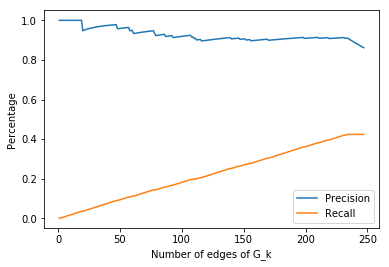

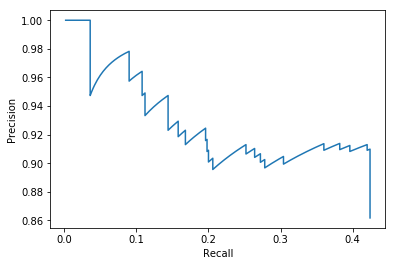

In [13]:
'''Plot the precision and the recall'''
nb_edge_itt = range(1,len(precision)+1)
plt.plot(nb_edge_itt,precision,label = "Precision")
plt.plot(nb_edge_itt,recall,label = "Recall")
plt.legend()
plt.xlabel("Number of edges of G_k")
plt.ylabel("Percentage")
plt.savefig("precision_vs_nb_edges.png")
plt.show()

plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("precision_vs_recall.png")
plt.show()

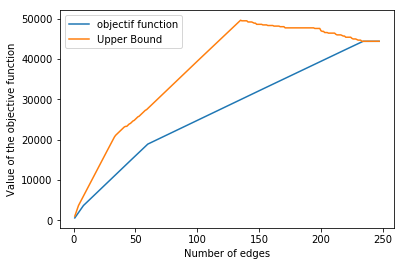

In [14]:
'''plot of the objective function and the upper bound'''

nb_edge = list(range(1,len(edge_info)+1))
gains = []
bound = []
for edge in edge_info :
    if len(gains)!= 0:
        marginal_gain = edge_info[edge][0]+gains[-1]
        theoretical_bound = edge_info[edge][1]+marginal_gain
    else :
        marginal_gain = edge_info[edge][0]
        theoretical_bound = edge_info[edge][0]+edge_info[edge][1] #Marginal_gain + marginal_bound
    gains.append(marginal_gain)
    bound.append(theoretical_bound)
plt.plot(nb_edge,gains,label = "objectif function")
plt.plot(nb_edge,bound,label = "Upper Bound")
plt.legend()
plt.xlabel("Number of edges")
plt.ylabel("Value of the objective function")
plt.savefig("Objective_fct_and_UpperBound.png")
plt.show()

In [ ]:
bound[-1]-gains[-1]

In [ ]:
'''
Plot of the number of cascades per edge
'''

tmp_dic = {}
for edge in cascades_per_edge_dic :
    nb_cascade_edge_is_in = len(cascades_per_edge_dic[edge])
    try :
        tmp_dic[nb_cascade_edge_is_in] +=1
    except KeyError :
        tmp_dic[nb_cascade_edge_is_in] = 1
sorted_nb_edge_cascade_list = sorted(tmp_dic.items(), key=operator.itemgetter(0))
x_data = []
y_data = []
for pairs in sorted_nb_edge_cascade_list :
    x_data.append(pairs[0])
    y_data.append(pairs[1])
plt.bar(x_data,y_data)
plt.xlabel("Number of cascades per edge")
plt.ylabel("Number of edges")
plt.savefig("cascade_per_edge.png")
plt.show()


In [ ]:
'''
plot the number of edges per cascades
'''
tmp_2_dic = {}
for c in DAG_Tree_c_dic :
    nb_edge_c = DAG_Tree_c_dic[c][0].number_of_edges()
    try :
        tmp_2_dic[nb_edge_c] += 1
    except KeyError :
        tmp_2_dic[nb_edge_c] = 1
tmp_list = list(sorted(tmp_2_dic.items(),key = operator.itemgetter(0)))
nb_edge_per_cascade = []
nb_cascades = []
for pair in tmp_list :
    nb_edge_per_cascade.append(pair[0])
    nb_cascades.append(pair[1])
plt.scatter(nb_edge_per_cascade,nb_cascades)
plt.xlabel("Number of edges per cascade")
plt.ylabel("Number of cascades")
plt.savefig("cascade_size.png")
plt.show()

